In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Finding intersection points of angular momentum sphere and the ellipsoid of kinetic energy

The formulae of angular momentum sphere and the ellipsoid of kinetic energy are:
$$x^2 + y^2 +z^2 = K$$
$$\frac{x^2}{2a} + \frac{y^2}{2b} + \frac{z^2}{2c} = M$$

Here, $K$ and $M$ are constants should be given by the system, and constant $(a, b, c)$ are moment of inertia in three dimensions.

According to the equation of ellipsoid of kinetic energy, we will convert the cartesian coordinate into spherical coordinate for further calculations with following:
$$ \left\{
\begin{aligned}
x & = \sqrt{2aM}cos(\phi)sin(\theta) \\
y & = \sqrt{2bM}sin(\phi)sin(\theta) \\
z & = \sqrt{2cM}cos(\theta)
\end{aligned}
\right.
$$

Then, plug $(x, y, z)$ into the equation of angular momentum sphere, we will get following expression of $\theta$ with respect to $\phi$:
$$
\begin{aligned}
            & 2aMcos^2(\phi)sin^2(\theta) + 2bMsin^2(\phi)sin^2(\theta) + 2cMcos^2(\theta) = K \\
\Rightarrow & 2aMcos^2(\phi)sin^2(\theta) + 2bM(1- cos^2(\phi))sin^2(\theta) + 2cMcos^2(\theta)  = K \\
\Rightarrow & sin^2(\theta)(2aMcos^2(\phi) + 2bM - 2bMcos^2(\phi)) + 2cMcos^2(\theta)  = K \\
\Rightarrow & (1 - cos^2(\theta))(2aMcos^2(\phi) + 2bM - 2bMcos^2(\phi)) + 2cMcos^2(\theta)  = K \\
\Rightarrow & (2cM - (2aM - abM)cos^2(\phi) - 2bM)cos^2(\theta)  = K - (2aM - abM)cos^2(\phi) - 2bM \\
\Rightarrow & cos^2(\theta) = \frac{K - (2aM - abM)cos^2(\phi) - 2bM}{(2cM - (2aM - abM)cos^2(\phi) - 2bM)} \\
\Rightarrow & \theta = arccos(\sqrt{\frac{K - (2aM - abM)cos^2(\phi) - 2bM}{(2cM - (2aM - abM)cos^2(\phi) - 2bM)}})
\end{aligned}
$$ 

In this way, we deduce the formula of expression of $\theta$ with respect to $\phi$. \
Plug them into the formula of $x, y, z$, we will finally get the corresponding cartesian coordinates of intersection points.

C:\Users\MSI_NB\AppData\Local\Temp\ipykernel_29460\2794461380.py:34: RuntimeWarning: divide by zero encountered in divide
  costheta2 = (K - (2*a*M - 2*b*M)*(np.cos(phi))**2 - 2*b*M)/(2*c*M - (2*a*M - 2*b*M)*(np.cos(phi))**2 - 2*b*M)
C:\Users\MSI_NB\AppData\Local\Temp\ipykernel_29460\2794461380.py:35: RuntimeWarning: invalid value encountered in arccos
  theta = np.arccos(np.sqrt(costheta2))


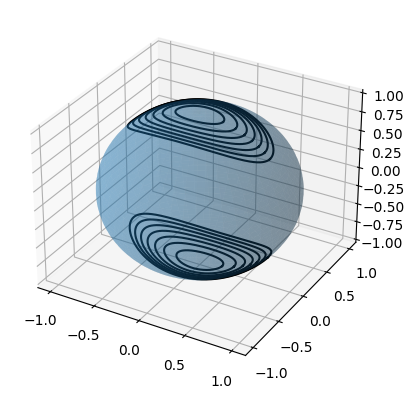

In [2]:
# define the angular momentum sphere 
u = np.linspace(0, 2*np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = 1 * np.outer(np.cos(u), np.sin(v))
y = 1 * np.outer(np.sin(u), np.sin(v))
z = 1 * np.outer(np.ones(np.size(u)), np.cos(v))

# plot the angular momentum sphere
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, alpha = 0.3)


# define the function of intersection points of ellipsoid and the sphere
def intersections(K, M, I):
    """
    Define the function for finding the intersection points of 
    the angular momentum sphere and the kinetic energy ellipsoid. (In R3)
    Method is convert the coordinate into spherical coordinate and use two functions get intersection points.

    Args:
        K (integer): the radius of angular momentum sphere 
        M (integer): the constant of Hamiltonian, rotational kinetic energy
        I (list): length 3 list, which represents the moment of inertia
    
    The function will return 3 numpy arrays, which represent the corresponding coordinates (x, y, z) of intersection points.
    Note: 
        This will only give the intersection points on uppersphere.
    """
    phi = np.linspace(0, 2*np.pi, 10000) # define phi
    a = I[0]
    b = I[1]
    c = I[2]
    costheta2 = (K - (2*a*M - 2*b*M)*(np.cos(phi))**2 - 2*b*M)/(2*c*M - (2*a*M - 2*b*M)*(np.cos(phi))**2 - 2*b*M)
    theta = np.arccos(np.sqrt(costheta2))
    interx = np.sqrt(2*a*M)*np.cos(phi)*np.sin(theta)
    intery = np.sqrt(2*b*M)*np.sin(phi)*np.sin(theta)
    interz = np.sqrt(2*c*M)*np.cos(theta)
    return interx, intery, interz

# define the moment of inertia in three directions (here we take 0.25, 0.64, 4 as example)
I = [0.64, 0.25, 4]

# define different constant for Hamiltonian and draw them
T = np.linspace(0, 0.5, 10)
for M in T:
    interx, intery, interz = intersections(1, M, I)
    ax.plot3D(interx, intery, interz, color='black')
    ax.plot3D(interx, intery, -interz, color='black')


C:\Users\MSI_NB\AppData\Local\Temp\ipykernel_29460\2794461380.py:35: RuntimeWarning: invalid value encountered in sqrt
  theta = np.arccos(np.sqrt(costheta2))


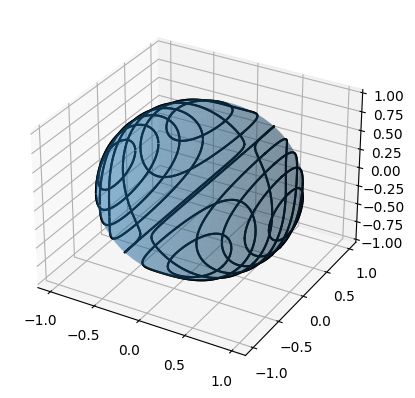

In [3]:
# define the angular momentum sphere 
u = np.linspace(0, 2*np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = 1 * np.outer(np.cos(u), np.sin(v))
y = 1 * np.outer(np.sin(u), np.sin(v))
z = 1 * np.outer(np.ones(np.size(u)), np.cos(v))

# plot the angular momentum sphere
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, alpha = 0.3)

# define the moment of inertia in three directions (here we take 0.25, 0.64, 4 as example)
I = [0.25, 0.64, 4]

# define different constant for Hamiltonian and draw them
T = np.linspace(0.25, 4, 15)

for M in T:
    interx, intery, interz = intersections(1, M, I)
    ax.plot3D(interx, intery, interz, color='black')
    ax.plot3D(interx, intery, -interz, color='black')
    ax.plot3D(interx, -intery, interz, color='black')
    ax.plot3D(interx, -intery, -interz, color='black')

plt.show()

In [ ]:
# define the angular momentum sphere 
u = np.linspace(0, 2*np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = 1 * np.outer(np.cos(u), np.sin(v))
y = 1 * np.outer(np.sin(u), np.sin(v))
z = 1 * np.outer(np.ones(np.size(u)), np.cos(v))

# plot the angular momentum sphere
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, alpha = 0.3)

# define the moment of inertia in three directions (here we take 0.25, 0.64, 4 as example)
I = [0.25, 0.64, 4]

def levelsets(K, M, I):
    """
    Define the function for finding the level sets of the kinetic energy on the angular momentum sphere.

    Args:
        K (integer): the radius of angular momentum sphere 
        M (integer): the constant of Hamiltonian, rotational kinetic energy
        I (list): length 3 list, which represents the moment of inertia
    
    The function will return 3 numpy arrays, which represent the corresponding coordinates (x, y, z) of intersection points.
    Note: 
        This will only give the points on uppersphere.
    """
    